In [2]:
"""!pip install transformers
!pip install sentencepiece ## restart kernel efter install hvis du mangler denne ##
!pip install accelerate -U
!pip install numpy --upgrade
!pip install tensorflow --upgrade
"""


'!pip install transformers\n!pip install sentencepiece ## restart kernel efter install hvis du mangler denne ##\n!pip install accelerate -U\n!pip install numpy --upgrade\n!pip install tensorflow --upgrade\n'

In [2]:
import torch
from torch.utils.data import DataLoader
from transformers import DefaultDataCollator
from helpers import load_transformer_model, zero_shot_eval
import pandas as pd
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


In [3]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

arabic_model_path =  "content_arabic/my_xlm_roberta_qa_model"
indonesian_model_path = "content_indonesian/my_xlm_roberta_qa_model"
bengali_model_path =  "content_bengali/my_xlm_roberta_qa_model"



arabic_model, arabic_tokenizer = load_transformer_model(arabic_model_path)
indonesian_model, indonesian_tokenizer = load_transformer_model(indonesian_model_path)
bengali_model, bengali_tokenizer = load_transformer_model(bengali_model_path)


---
### Load datasættet tokenize og preprocesser

In [4]:
bengali_model = bengali_model.to(device)
indonesian_model = indonesian_model.to(device)
arabic_model = arabic_model.to(device)



In [9]:

zs_bengali_arabic = zero_shot_eval(bengali_model, device, 'arabic', bengali_tokenizer, 'bengali')
zs_bengali_indonesian = zero_shot_eval(bengali_model, device, 'indonesian', bengali_tokenizer, 'bengali')

zs_arabic_bengali = zero_shot_eval(arabic_model, device, 'bengali', arabic_tokenizer, 'arabic')
zs_arabic_indonesian = zero_shot_eval(arabic_model, device, 'indonesian', arabic_tokenizer, 'arabic')

zs_indonesian_bengali = zero_shot_eval(indonesian_model, device, 'bengali', indonesian_tokenizer, 'indonesian')
zs_indonesian_arabic = zero_shot_eval(indonesian_model, device, 'arabic', indonesian_tokenizer, 'indonesian')
    


Map: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29598/29598 [00:08<00:00, 3482.08 examples/s]


bengali average Loss: 1.9821
arabic -> bengali
bengali accuracy (Start): 0.5867
bengali accuracy (End): 0.6300
bengali average Loss: 1.5839
indonesian -> bengali
bengali accuracy (Start): 0.6410
bengali accuracy (End): 0.6658


Map: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4779/4779 [00:01<00:00, 3316.74 examples/s]


arabic average Loss: 2.0921
bengali -> arabic
arabic accuracy (Start): 0.5758
arabic accuracy (End): 0.5411
arabic average Loss: 1.0339
indonesian -> arabic
arabic accuracy (Start): 0.7579
arabic accuracy (End): 0.7471


Map: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4779/4779 [00:01<00:00, 3177.26 examples/s]


indonesian average Loss: 2.3085
bengali -> indonesian
indonesian accuracy (Start): 0.5758
indonesian accuracy (End): 0.5671
indonesian average Loss: 1.2567
arabic -> indonesian
indonesian accuracy (Start): 0.7370
indonesian accuracy (End): 0.7138


In [11]:
zs_bengali_arabic[0], zs_bengali_indonesian[0], zs_arabic_bengali[0], zs_arabic_indonesian[0], zs_indonesian_bengali[0], zs_indonesian_arabic[0]

('arabic -> bengali',
 'indonesian -> bengali',
 'bengali -> arabic',
 'indonesian -> arabic',
 'bengali -> indonesian',
 'arabic -> indonesian')

In [13]:
zs_bengali_arabic[1], zs_bengali_indonesian[1], zs_arabic_bengali[1], zs_arabic_indonesian[1], zs_indonesian_bengali[1], zs_indonesian_arabic[1]

(   Average Loss  Accuracy (Start)  Accuracy (End)
 0      1.982096          0.586722        0.629954,
    Average Loss  Accuracy (Start)  Accuracy (End)
 0      1.583883          0.640962        0.665837,
    Average Loss  Accuracy (Start)  Accuracy (End)
 0      2.092069          0.575758        0.541126,
    Average Loss  Accuracy (Start)  Accuracy (End)
 0      1.033925          0.757877        0.747098,
    Average Loss  Accuracy (Start)  Accuracy (End)
 0      2.308534          0.575758          0.5671,
    Average Loss  Accuracy (Start)  Accuracy (End)
 0      1.256675          0.737005        0.713845)

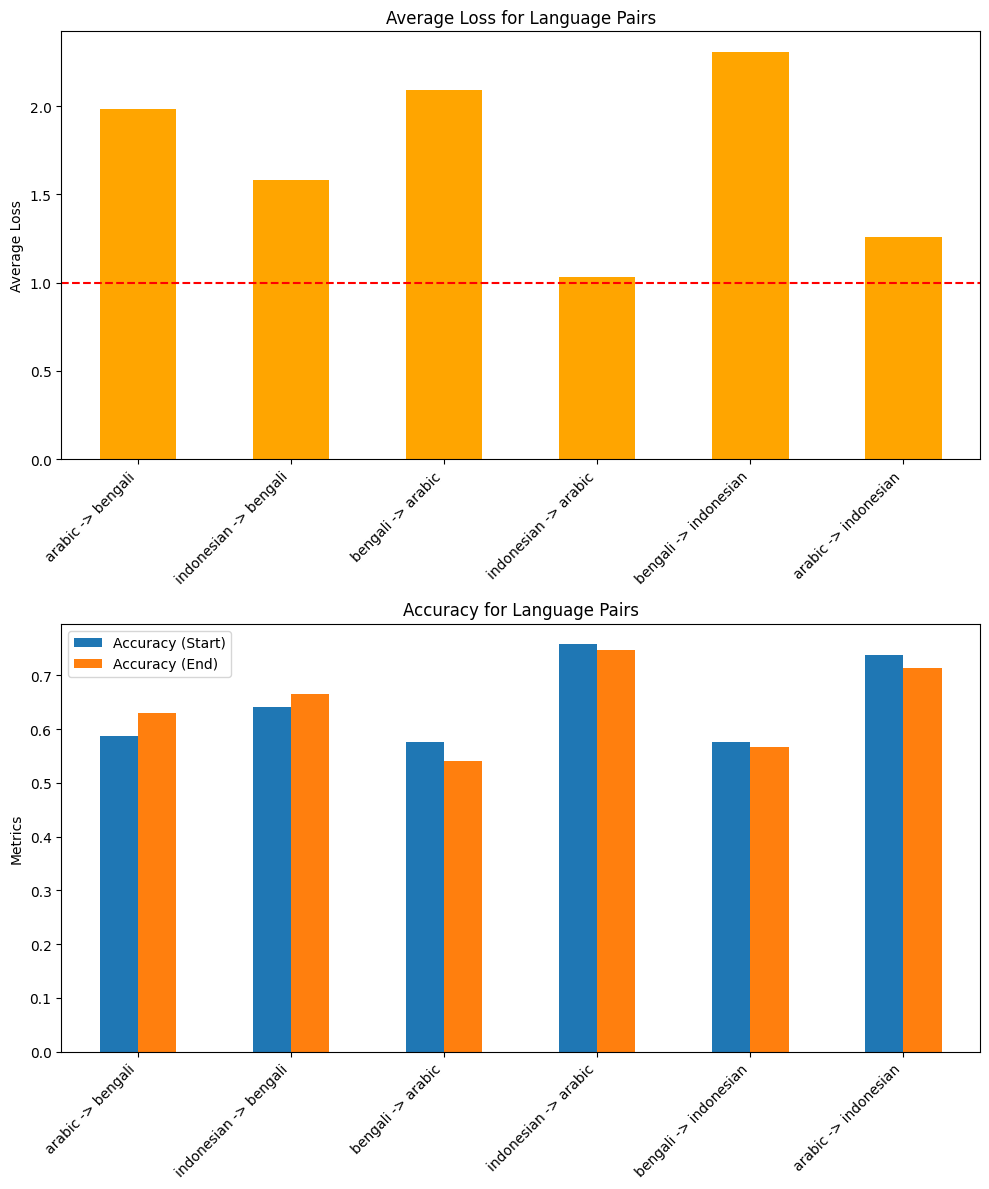

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
language_pairs = ('arabic -> bengali', 'indonesian -> bengali', 'bengali -> arabic',
                  'indonesian -> arabic', 'bengali -> indonesian', 'arabic -> indonesian')

data = {
    'Average Loss': [1.982096, 1.583883, 2.092069, 1.033925, 2.308534, 1.256675],
    'Accuracy (Start)': [0.586722, 0.640962, 0.575758, 0.757877, 0.575758, 0.737005],
    'Accuracy (End)': [0.629954, 0.665837, 0.541126, 0.747098, 0.5671, 0.713845]
}

# Create DataFrame
df = pd.DataFrame(data, index=language_pairs)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot Average Loss
df['Average Loss'].plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_ylabel('Average Loss')
axes[0].set_title('Average Loss for Language Pairs')
axes[0].set_xticklabels(language_pairs, rotation=45, ha='right')  # Rotate x-axis labels
axes[0].axhline(y=1, color='red', linestyle='--')  # Add a horizontal line at y=1

# Plot Accuracy (Start) and Accuracy (End)
df[['Accuracy (Start)', 'Accuracy (End)']].plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Metrics')
axes[1].set_title('Accuracy for Language Pairs')
axes[1].set_xticklabels(language_pairs, rotation=45, ha='right')  # Rotate x-axis labels

# Display the plots
plt.tight_layout()
plt.show()


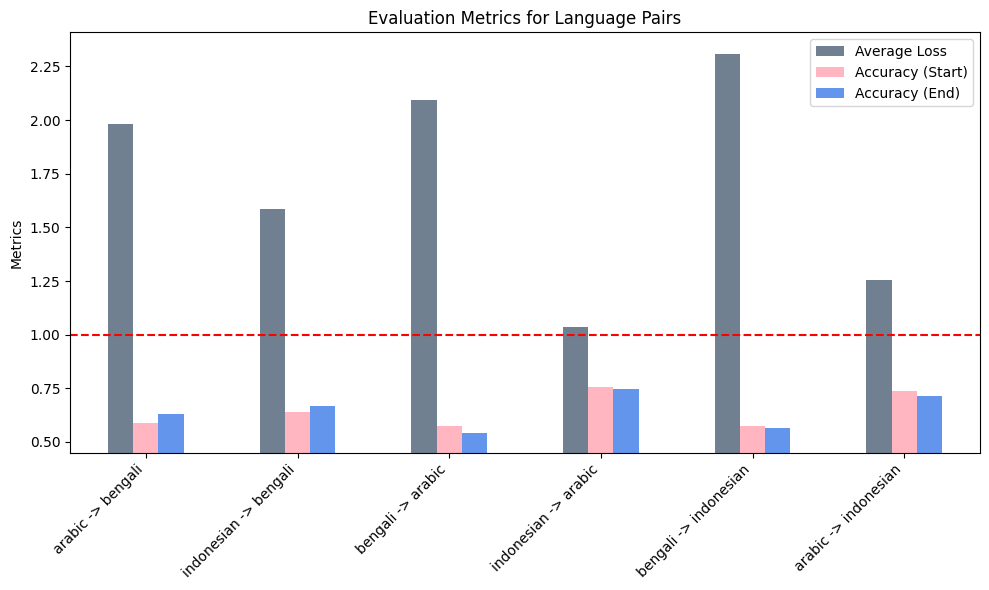

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
language_pairs = ('arabic -> bengali', 'indonesian -> bengali', 'bengali -> arabic',
                  'indonesian -> arabic', 'bengali -> indonesian', 'arabic -> indonesian')

data = {
    'Average Loss': [1.982096, 1.583883, 2.092069, 1.033925, 2.308534, 1.256675],
    'Accuracy (Start)': [0.586722, 0.640962, 0.575758, 0.757877, 0.575758, 0.737005],
    'Accuracy (End)': [0.629954, 0.665837, 0.541126, 0.747098, 0.5671, 0.713845]
}

# Create DataFrame
df = pd.DataFrame(data, index=language_pairs)

# Plotting with a different color palette
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['slategrey', 'lightpink', 'cornflowerblue']  # Set custom colors
df.plot(kind='bar', ax=ax, color=colors)
ax.set_xticklabels(language_pairs, rotation=45, ha='right')  # Rotate x-axis labels
ax.set_ylabel('Metrics')
ax.set_title('Evaluation Metrics for Language Pairs')

# Set y-axis offset to 0.3
ax.set_ylim(0.45, max(df.values.max(axis=1)) + 0.1)  # Adjust the second argument as needed

# Add a horizontal red line at y=1
ax.axhline(y=1, color='red', linestyle='--')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('zero_shot.png')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Move model to GPU
bengali_model = bengali_model.to(device)

# Collate function to prepare data batches
data_collator = DefaultDataCollator(return_tensors="pt")

# DataLoader for validation set
val_dataloader = DataLoader(val_dataset, batch_size=8, collate_fn=data_collator)

# Evaluation loop
bengali_model.eval()
total_loss = 0.0  # Variable to store the total loss
all_preds_start, all_preds_end, all_true_start, all_true_end = [], [], [], []



with torch.no_grad():
    for batch in val_dataloader:
        # Move batch to GPU
        batch = {k: v.to(device) for k, v in batch.items()}
        
        # Forward pass
        outputs = bengali_model(**batch)
        
        # Compute the loss (assuming you have a 'loss' key in your outputs)
        loss = outputs.loss
        
        # Update total loss
        total_loss += loss.item()
        
        # Get predicted start and end positions
        preds_start = torch.argmax(outputs.start_logits, dim=1)
        preds_end = torch.argmax(outputs.end_logits, dim=1)
        
        # Get true start and end positions
        true_start = batch["start_positions"]
        true_end = batch["end_positions"]
        
        # Append predictions and true values for accuracy calculation
        all_preds_start.extend(preds_start.cpu().tolist())
        all_preds_end.extend(preds_end.cpu().tolist())
        all_true_start.extend(true_start.cpu().tolist())
        all_true_end.extend(true_end.cpu().tolist())

# Calculate average loss
average_loss = total_loss / len(val_dataloader)
print(f"Average Loss: {average_loss:.4f}")

# Calculate accuracy
accuracy_start = accuracy_score(all_true_start, all_preds_start)
accuracy_end = accuracy_score(all_true_end, all_preds_end)
print(f"Accuracy (Start): {accuracy_start:.4f}")
print(f"Accuracy (End): {accuracy_end:.4f}")
